# Taller 2


## Planteamiento del problema
La alcandía de una ciudad está interesada en implementar un nuevo servicio de patinetas para incentivar la movilidad sostenible y como parte de este proceso se encuentra evaluando la viabilidad económica e impacto de dicho servicio. Dado lo anterior, le ha encargado a la consultora Andes CDA el desarrollo de un modelo predictivo de la demanda de patinetas por día con base en datos de una ciudad vecina. Su objetivo como consultor de esta empresa es la creación del mejor modelo posible de regresión lineal que le permita predecir el número de usuarios promedio por día del nuevo servicio, al mismo tiempo de poder entender la importancia y relación de las variables consideradas. 

Diccionario de datos:

|Field	|Description|
|-------|-----------|
|Instant	|Record Index|
|Date	|Date (Format: YYYY-MM-DD)|
|Season	|Season of the year|
|Holiday	|Is it holiday?|
|Weather	|Description of the weather situation|
|Temp	|Temperature in Celsius|
|Feel_Temp	|Feeling temperature in Celsius|
|Hum	|Normalized humidity|
|Wind	|Wind speed in m/s|
|Casual	|Count of casual users|
|Registered	|Count of   registered users|
|cnt	|Count of total rental bikes including both casual and registered|


Cargando las librerías que se usarán

In [145]:
# Cargando las libreías
import numpy as np
import pandas as pd
from datetime import datetime
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

%matplotlib inline

## **1. Limpieza y preparación de datos** (25 pts)
Búsqueda y corrección de valores atípicos, valores faltantes y duplicados; ya que el dataset no es muy extenso deberá abstenerse de eliminar registros. Así mismo, genere nuevas variables con base en la información suministrada. 


In [146]:
data_df = pd.read_csv('./Data/Data_Taller_2.csv', sep = ';')

In [147]:
data_df.head(10)

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,"8,175849","9,090375","0,805833","10,749882",331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,"9,083466","8,625733","0,696087","-16,652113",131,670,801
2,3,3/01/2020,Springer,No,Few clouds,"1,229108","0,902035","0,437273","16,636703",120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,"1,4","1,969734","0,590435","10,739832",108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,"2,666979","2,77569","0,436957","12,5223",82,1518,1600
5,6,6/01/2020,Springer,No,Clear,"1,604356","2,960823","0,518261","6,0008684",88,1518,1606
6,7,7/01/2020,Springer,No,Mist,"1,236534","1,815433","0,498696","11,304642",148,1362,1510
7,8,8/01/2020,Springer,No,Mist + Broken clouds,"-0,245","-0,374062","0,535833","17,875868",68,891,959
8,9,9/01/2020,Springer,No,Partly cloudy,"-1,498349","-2,539775","0,434167","24,25065",54,768,822
9,10,10/01/2020,Springer,No,Partly cloudy,"-0,910849","-0,908264","0,482917","14,958889",41,1280,1321


Tamaño del conjunto de datos

In [148]:
data_df.shape

(731, 12)

Visualizando los tipos de datos por columna

In [149]:
data_df.dtypes

instant        int64
Date          object
Season        object
Holiday       object
Weather       object
Temp          object
Feel_Temp     object
Hum           object
Wind          object
Casual         int64
Registered     int64
cnt            int64
dtype: object

Perfilamiento de los datos

In [150]:
profile = ProfileReport(data_df)

In [151]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Valores atípicos

In [152]:
# Outliers
data_df_outliers = data_df.loc[data_df['cnt'] >= data_df['cnt'].quantile(.95)]
data_df_outliers.head()

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
441,442,17/03/2021,Springer,No,Mist + Few clouds,"16,165849","15,737162","0,755833","7,417168",3155,4681,7836
447,448,23/03/2021,Summer,No,Mist + Broken clouds,"20,278349","18,793149","0,694167","7,7921",2469,5893,8362
503,504,18/05/2021,Summer,No,Partly cloudy,"18,515849","17,902687","0,523333","9,166739",1521,6118,7639
504,505,19/05/2021,Summer,No,Few clouds,"20,2","18,644676","0,45625","5,626325",3410,4884,8294
518,519,2/06/2021,Summer,No,Clear,"19,416651","18,615536","0,549167","12,499654",2795,5325,8120


In [153]:
data_df_outliers.shape

(37, 12)

Valores duplicados

In [154]:
data_df.duplicated().sum()

0

Verificando nulos en el conjunto de datos

In [155]:
data_df.isna().sum()

instant       0
Date          0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

Viendo el total de de filas que contienen valores nulos

In [156]:
data_df[data_df.isnull().any(axis=1)]

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
99,100,10/04/2020,Summer,No,Mist + Few clouds,NaN,"12,056639","0,8575","9,833389",1188,1707,2895
229,230,18/08/2020,Fall,No,Partly cloudy,NaN,"23,126126","0,654583","15,624936",639,3166,3805
562,563,16/07/2021,Fall,No,Clear,NaN,"26,033875","0,645","11,000529",1088,5742,6830
721,722,22/12/2021,Springer,No,Partly cloudy,NaN,"3,097311","10,44125","27,292182",205,1544,1749


In [157]:
#data = data.fillna(data.mean())

### Análisis de variables

De acuerdo a lo observado anteriormente, sabemos que la única variable que tiene valores faltantes o nulos es "Temp".

#### Instant

In [158]:
data_df['instant'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Variable usada como índice, se dice que puede ser removida ya que no aporta información.

#### Date

In [159]:
data_df['Date'].unique()

array(['1/01/2020', '2/01/2020', '3/01/2020', '4/01/2020', '5/01/2020',
       '6/01/2020', '7/01/2020', '8/01/2020', '9/01/2020', '10/01/2020',
       '11/01/2020', '12/01/2020', '13/01/2020', '14/01/2020',
       '15/01/2020', '16/01/2020', '17/01/2020', '18/01/2020',
       '19/01/2020', '20/01/2020', '21/01/2020', '22/01/2020',
       '23/01/2020', '24/01/2020', '25/01/2020', '26/01/2020',
       '27/01/2020', '28/01/2020', '29/01/2020', '30/01/2020',
       '31/01/2020', '1/02/2020', '2/02/2020', '3/02/2020', '4/02/2020',
       '5/02/2020', '6/02/2020', '7/02/2020', '8/02/2020', '9/02/2020',
       '10/02/2020', '11/02/2020', '12/02/2020', '13/02/2020',
       '14/02/2020', '15/02/2020', '16/02/2020', '17/02/2020',
       '18/02/2020', '19/02/2020', '20/02/2020', '21/02/2020',
       '22/02/2020', '23/02/2020', '24/02/2020', '25/02/2020',
       '26/02/2020', '27/02/2020', '28/02/2020', '1/03/2020', '2/03/2020',
       '3/03/2020', '4/03/2020', '5/03/2020', '6/03/2020', '7/03/202

Se observa que se tiene una fecha única por cada registro

#### Season

In [160]:
data_df['Season'].unique()

array(['Springer', 'Summer', 'Fall', 'Winter'], dtype=object)

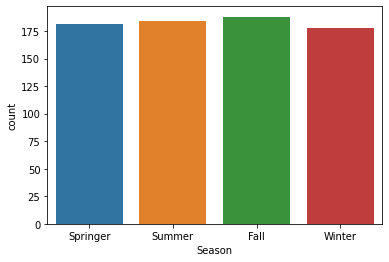

In [161]:
sns.countplot(x=data_df["Season"])
plt.show()

La variable Season es categórica y puede tomar 4 posibles valores. Se observa que los datos están balanceados.

#### Holiday

In [162]:
data_df['Holiday'].unique()

array(['No', 'Yes'], dtype=object)

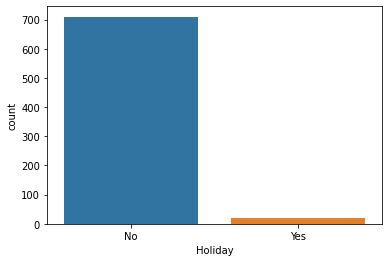

In [163]:
sns.countplot(x=data_df["Holiday"])
plt.show()

Variable categórica con dos posible valores. Se observa que está desbalanceada, debido a que en el año se tienen pocos festivos.

#### Weather

In [164]:
data_df['Weather'].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

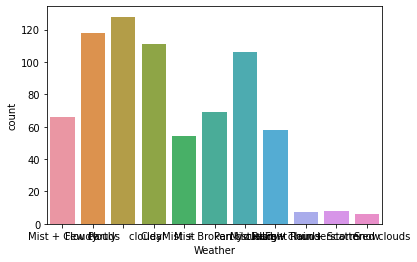

In [165]:
sns.countplot(x=data_df["Weather"])
plt.rcParams['figure.figsize']=(30,5)
#plt.show()

Variable categórica que puede tomar 10 posibles valores. Varios de ellos son una composición de dos.

#### Temp

In [166]:
data_df['Temp'].unique()

array(['8,175849', '9,083466', '1,229108', '1,4', '2,666979', '1,604356',
       '1,236534', '-0,245', '-1,498349', '-0,910849', '-0,052723',
       '0,118169', '-0,43911', '2,966651', '2,888349', '0,264151',
       '2,183349', '5,732178', '4,298349', '0,3425', '-5,2208712',
       '-3,4634801', '-3,4226089', '2,503466', '2,2225', '1,165',
       '1,563466', '2,176534', '0,499151', '1,032178', '4,22', '0,786979',
       '1,931288', '5,434151', '4,768349', '2,379151', '-1,665199',
       '-1,215644', '0,887277', '2,4575', '6,876534', '11,505',
       '4,506089', '6,958267', '12,484151', '16,518349', '10,760849',
       '5,405199', '6,256651', '0,564434', '2,421733', '5,895644',
       '9,124356', '5,2775', '8,143466', '11,141831', '4,533349', '7,745',
       '1,321651', '10,055849', '9,696534', '4,301733', '5,7475',
       '5,904151', '10,287277', '7,470849', '10,064356', '7,285199',
       '6,917377', '9,165199', '17,38', '14,2075', '7,6275', '12,230445',
       '12,758349', '8,306979'

Convirtiendo la variable a numérica

In [167]:
# Reemplazando el separador de coma a punto
data_df["Temp"] = data_df["Temp"].str.replace(',', '.')
# Convirtiendo los datos
data_df["Temp"] = pd.to_numeric(data_df["Temp"], errors='coerce', downcast='float')

In [168]:
data_df["Temp"].describe()

count    727.000000
mean      15.271063
std        8.595965
min       -5.220871
25%        7.842925
50%       15.421651
75%       22.785000
max       32.498348
Name: Temp, dtype: float64

Se imputarán los valores nulos con el valor promedio

In [169]:
data_df.loc[data_df["Temp"].isnull(), 'Temp'] = data_df["Temp"].mean()
data_df["Temp"].isnull().sum()

0

In [170]:
# Redondeando los datos con un decimal
data_df["Temp"] = data_df["Temp"].apply(lambda x: round(x, 1))

In [171]:
data_df.Temp.dtypes

dtype('float64')

In [172]:
data_df["Temp"]

0      8.2
1      9.1
2      1.2
3      1.4
4      2.7
      ... 
726    3.9
727    3.9
728    3.9
729    4.0
730    2.1
Name: Temp, Length: 731, dtype: float64

<AxesSubplot:>

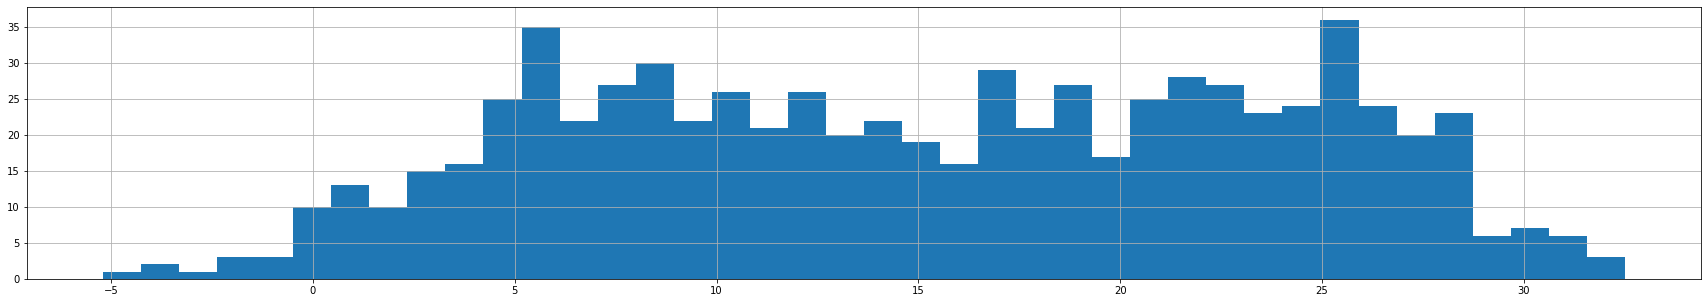

In [173]:
data_df['Temp'].hist(bins=40)

#### Feel Temp

In [174]:
data_df['Feel_Temp'].unique()

array(['9,090375', '8,625733', '0,902035', '1,969734', '2,77569',
       '2,960823', '1,815433', '-0,374062', '-2,539775', '-0,908264',
       '0,998808', '-0,457769', '-0,908499', '0,855411', '3,661264',
       '3,008199', '0,308237', '2,919651', '6,025834', '3,98735',
       '-0,581849', '-4,2837288', '-3,3545623', '-2,45729', '3,022722',
       '1,5692', '2,3259', '2,495899', '1,969922', '3,765134', '0,75375',
       '3,02291', '3,957599', '0,360266', '2,743589', '3,423726',
       '5,708537', '6,271926', '1,317562', '-1,218699', '-0,971244',
       '2,034923', '2,948838', '7,233311', '10,72245', '3,950878',
       '6,8614', '12,146926', '16,063201', '10,395988', '5,03451',
       '5,351525', '0,743551', '3,548699', '5,591977', '8,471667',
       '5,263024', '8,502123', '10,805546', '4,402313', '7,043337',
       '1,406251', '4,016913', '9,802613', '9,213844', '3,207667',
       '6,2128', '5,470576', '10,126396', '6,335', '7,31025', '9,864277',
       '7,604', '6,954366', '9,24571',

Modificando el separador de coma a punto

In [175]:
# Reemplazando el separador de coma a punto
data_df["Feel_Temp"] = data_df["Feel_Temp"].str.replace(',', '.')
# Convirtiendo los datos
data_df["Feel_Temp"] = pd.to_numeric(data_df["Feel_Temp"], errors='coerce', downcast='float')

In [176]:
data_df["Feel_Temp"].describe()

count    731.000000
mean      14.294639
std        7.659175
min       -4.283729
25%        7.878597
50%       14.876451
75%       20.604294
max       31.522112
Name: Feel_Temp, dtype: float64

Redondeando los valores con un decimal

In [177]:
# Redondeando los datos con un decimal
data_df["Feel_Temp"] = data_df["Feel_Temp"].apply(lambda x: round(x, 1))

In [178]:
data_df.Feel_Temp.dtypes

dtype('float64')

In [179]:
data_df["Feel_Temp"]

0      9.1
1      8.6
2      0.9
3      2.0
4      2.8
      ... 
726    2.7
727    4.0
728    3.4
729    2.9
730    2.5
Name: Feel_Temp, Length: 731, dtype: float64

<AxesSubplot:>

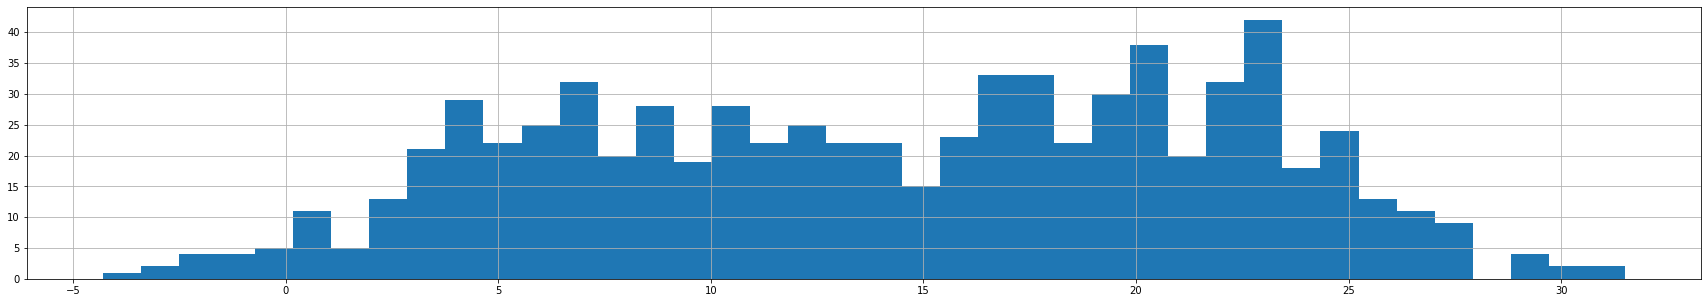

In [180]:
data_df['Feel_Temp'].hist(bins=40)

#### Hum

In [181]:
data_df['Hum'].unique()

array(['0,805833', '0,696087', '0,437273', '0,590435', '0,436957',
       '0,518261', '0,498696', '0,535833', '0,434167', '0,482917',
       '0,686364', '0,599545', '0,470417', '0,537826', '0,49875',
       '0,48375', '0,5375', '0,861667', '0,741739', '0,538333',
       '0,457083', '0,4', '0,436522', '0,491739', '0,616957', '0,8625',
       '0,6875', '0,793043', '0,651739', '0,722174', '0,60375',
       '0,829565', '0,775417', '0,437826', '0,585217', '0,929167',
       '0,568333', '0,738333', '0,537917', '0,494783', '0,437391',
       '0,506364', '0,544167', '0,457391', '0,375833', '0,314348',
       '0,423478', '0,505', '0,516667', '0,187917', '0,407826', '0,605',
       '0,577778', '0,423043', '0,697391', '0,712174', '0,68', '0,876364',
       '0,535', '0,449583', '0,318333', '0,610417', '0,789167',
       '0,948261', '0,551304', '0,420833', '0', '0,649565', '0,594583',
       '0,527391', '0,496957', '0,655652', '0,776522', '0,602917',
       '0,525217', '0,379167', '0,47375', '0,737

In [182]:
# Reemplazando el separador de coma a punto
data_df["Hum"] = data_df["Hum"].str.replace(',', '.')
# Convirtiendo los datos
data_df["Hum"] = pd.to_numeric(data_df["Hum"], errors='coerce', downcast='float')

In [183]:
data_df["Hum"].describe()

count    731.000000
mean       0.682614
std        0.750679
min        0.000000
25%        0.522291
50%        0.629167
75%        0.732709
max       10.867083
Name: Hum, dtype: float64

Redondeando los valores a dos decimales

In [184]:
# Redondeando los datos con un decimal
data_df["Hum"] = data_df["Hum"].apply(lambda x: round(x, 2))

In [185]:
data_df.Feel_Temp.dtypes

dtype('float64')

In [186]:
data_df["Hum"].head()

0    0.81
1    0.70
2    0.44
3    0.59
4    0.44
Name: Hum, dtype: float64

<AxesSubplot:>

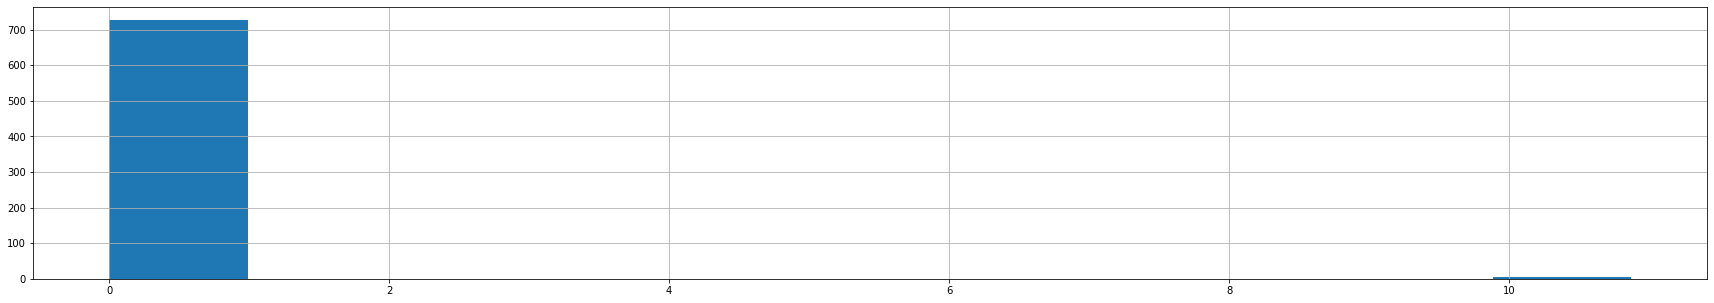

In [187]:
data_df['Hum'].hist(bins=11)

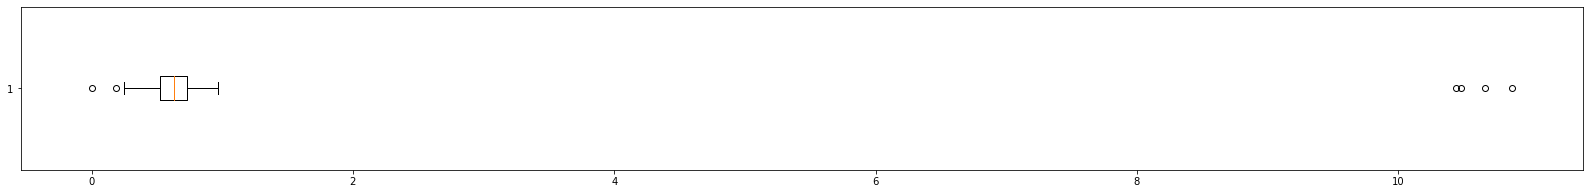

In [188]:
plt.figure(figsize = (28, 3))
plt.boxplot(data_df['Hum'], vert = False)
plt.show()

Teniendo en cuenta estos valores atípicos, se procesarán asignandoles el valor mayor que no pertenece a estos valores atípicos:

In [189]:
data_df['Hum'].describe(percentiles = [.01, .25, .5, .75, .95, .99])

count    731.000000
mean       0.682681
std        0.750721
min        0.000000
1%         0.310000
25%        0.520000
50%        0.630000
75%        0.730000
95%        0.880000
99%        0.950000
max       10.870000
Name: Hum, dtype: float64

In [190]:
data_df['Hum'].quantile(0.01)

0.31

In [191]:
data_df['Hum'].quantile(0.99)

0.95

In [192]:
def fix_Hum(num):
    if num > 0.95:
        num = 0.95
    elif num < 0.31:
        num = 0.31
    return num

In [193]:
data_df["Hum"] = data_df["Hum"].apply(lambda x: fix_Hum(x))

Viendo los datos de nuevo

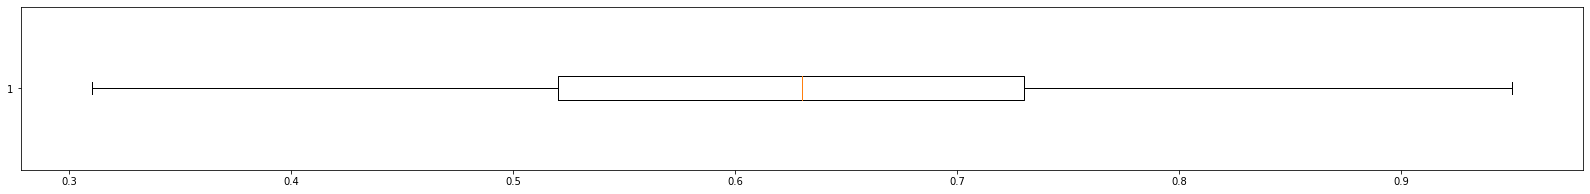

In [194]:
plt.figure(figsize = (28, 3))
plt.boxplot(data_df['Hum'], vert = False)
plt.show()

#### Wind

In [195]:
data_df['Wind'].unique()

array(['10,749882', '-16,652113', '16,636703', '10,739832', '12,5223',
       '6,0008684', '11,304642', '17,875868', '24,25065', '14,958889',
       '8,182844', '20,410009', '20,167', '8,478716', '10,583521',
       '12,625011', '12,999139', '9,833925', '13,957239', '13,125568',
       '23,667214', '11,52199', '16,5222', '10,60811', '8,696332',
       '19,68795', '7,627079', '8,2611', '9,739455', '4,9568342',
       '12,541864', '3,565271', '17,708636', '18,609384', '8,565213',
       '10,792293', '9,5006', '3,0423561', '12,652213', '14,869645',
       '7,27285', '13,625589', '17,479161', '27,999836', '19,522058',
       '16,869997', '15,416968', '17,749975', '34,000021', '14,956745',
       '20,625682', '13,110761', '6,305571', '16,783232', '23,218113',
       '12,500257', '8,391616', '19,408962', '14,500475', '20,624811',
       '15,125518', '13,624182', '16,875357', '23,000229', '22,870584',
       '8,08355', '14,75005', '17,545759', '15,60899', '14,791925',
       '18,130468', '9,1

In [196]:
# Reemplazando el separador de coma a punto
data_df["Wind"] = data_df["Wind"].str.replace(',', '.')
# Convirtiendo los datos
data_df["Wind"] = pd.to_numeric(data_df["Wind"], errors='coerce', downcast='float')

In [197]:
data_df["Wind"].describe()

count    731.000000
mean      12.668792
std        5.417463
min      -16.652113
25%        9.000746
50%       12.124789
75%       15.624802
max       34.000023
Name: Wind, dtype: float64

Redondeando los valores a dos decimales

In [198]:
# Redondeando los datos con un decimal
data_df["Wind"] = data_df["Wind"].apply(lambda x: round(x, 2))

In [199]:
data_df.Feel_Temp.dtypes

dtype('float64')

In [200]:
data_df["Wind"].head()

0    10.75
1   -16.65
2    16.64
3    10.74
4    12.52
Name: Wind, dtype: float64

In [201]:
data_df['Wind'].describe(percentiles = [.01, .25, .5, .75, .95, .99])

count    731.000000
mean      12.668865
std        5.417284
min      -16.650000
1%         3.142000
25%        9.000000
50%       12.120000
75%       15.620000
95%       23.000000
99%       27.381000
max       34.000000
Name: Wind, dtype: float64

In [202]:
data_df['Wind'].quantile(0.01)

3.142

In [203]:
data_df['Wind'].quantile(0.99)

27.381000000000007

<AxesSubplot:>

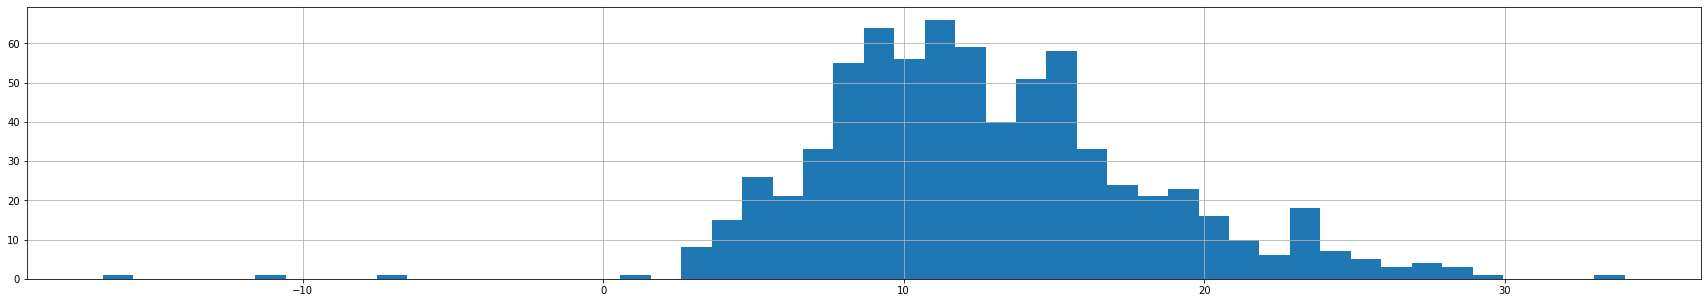

In [204]:
data_df['Wind'].hist(bins=50)

Se observan valores negativos, los cuales no tienen sentido puesto que estamos midiendo una velocidad, y en este contexto no tendría mucho sentido una desaceleración.
Asimismo, se define un máximo de acuerdo al quantil 99 y el máximo del conjunto de datos

In [205]:
print("Diferencia entre el quantil 99 y el dato máximo:")
diff = round(data_df['Wind'].max() - data_df['Wind'].quantile(0.99), 2)
print(diff)

print("El umbral para el máximo será:")
print(data_df['Wind'].max() - diff)

Diferencia entre el quantil 99 y el dato máximo:
6.62
El umbral para el máximo será:
27.38


In [206]:
def fix_Wind(num):
    if num < 0:
        num = num * -1
    if num > 27.38:
        num = 28
    return num

In [207]:
data_df["Wind"] = data_df["Wind"].apply(lambda x: fix_Wind(x))

Viendo los datos después de la corrección de valores negativos

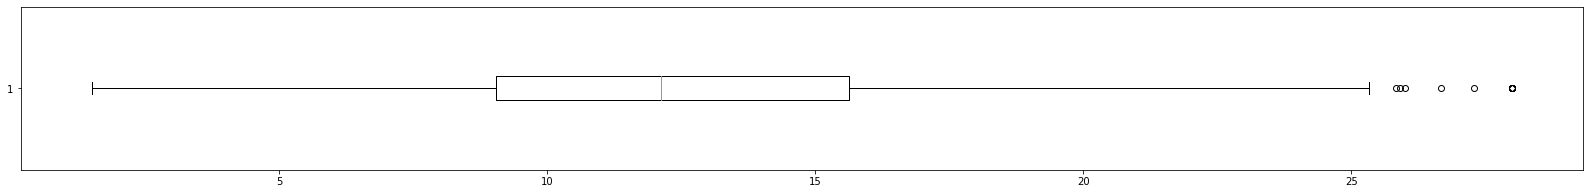

In [208]:
plt.figure(figsize = (28, 3))
plt.boxplot(data_df['Wind'], vert = False)
plt.show()

#### Casual

In [209]:
data_df['Casual'].unique()

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,  222,  251,  117,    9,   78,   83,   75,   93,  150,
         86,  186,   34,   15,  123,  140,   42,   47,   72,   61,  100,
        354,   64,   53,  149,  288,  397,  208,  218,  259,  579,  532,
        639,  195,   74,  139,  424,  694,   81,  137,  231,  214,  640,
        114,  244,  316,  191,   46,  247,  724,  982,  359,  289,  321,
        884, 1424, 1047,  401,  460,  203,  166,  300,  981,  472,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  550,  695,  692,
        902, 1582,  536,  735,  909, 2258, 1576,  836,  659,  740,  758,
        871, 2001, 2355, 1549,  673,  513,  736, 1869, 1685,  763,  676,
        563,  815, 1729, 1467,  863,  727,  769,  5

In [210]:
data_df['Casual'].dtypes

dtype('int64')

In [211]:
data_df["Casual"].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: Casual, dtype: float64

<AxesSubplot:>

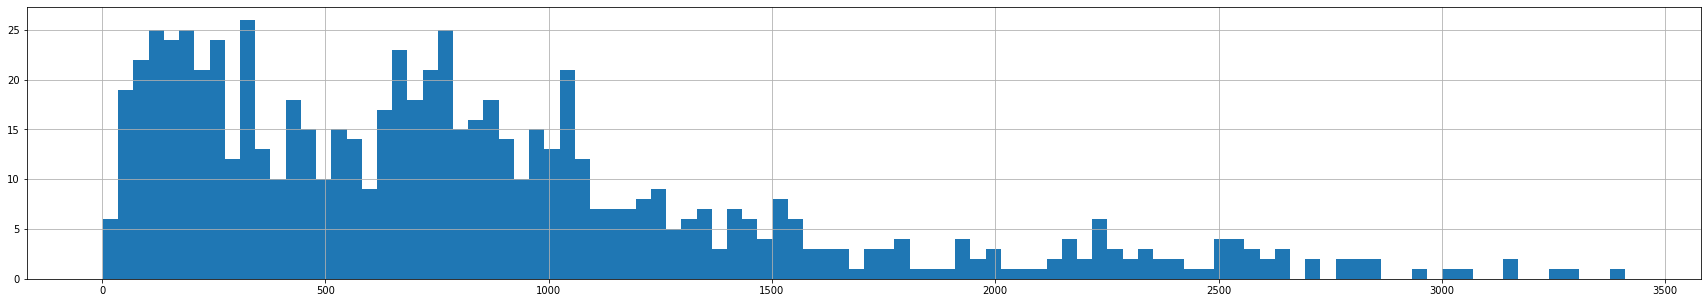

In [212]:
data_df['Casual'].hist(bins=100)

Teniendo en cuenta que los valores atípicos de esta variable están relacionados con la variable objetivo, se desea dejar los valores altos para visualozar su comportamiento.

#### Registered

In [213]:
data_df['Registered'].unique()

array([ 654,  670, 1229, 1454, 1518, 1362,  891,  768, 1280, 1220, 1137,
       1368, 1367, 1026,  953,  883,  674, 1572, 1844, 1468,  888,  836,
       1330, 1799,  472,  416, 1129,  975,  956, 1459, 1313, 1489, 1620,
        905, 1269, 1592, 1466, 1552, 1491, 1597, 1184, 1192, 1705, 1675,
       1897, 2216, 2348, 1103, 1173,  912, 1376, 1778, 1707, 1341, 1545,
       1708, 1365, 1714, 1903, 1562, 1730, 1437,  491, 1628, 1817, 1700,
        577, 1408, 1435, 1687, 1767, 1871, 2320, 2355, 1693, 1424, 1676,
       2243, 1918, 1699, 1910, 1515, 1221, 1806, 2108, 1506, 1920, 1354,
       1598, 2381, 2395, 2570, 1299, 1576, 2493, 1777, 1953, 2738, 2484,
       2186, 2760, 2795, 3331, 3444, 2574, 2481, 3300, 3722, 3325, 3489,
       3717, 3347, 2213, 3554, 3848, 2378, 3819, 3714, 3102, 2932, 3698,
       4109, 3632, 4169, 3413, 2507, 2971, 3185, 3445, 3319, 3840, 4008,
       3547, 3084, 3438, 3833, 4238, 3919, 3808, 2757, 2433, 2549, 3309,
       3461, 4232, 4414, 3473, 3221, 3875, 4070, 37

In [214]:
data_df['Registered'].dtypes

dtype('int64')

In [215]:
data_df["Registered"].describe()

count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: Registered, dtype: float64

<AxesSubplot:>

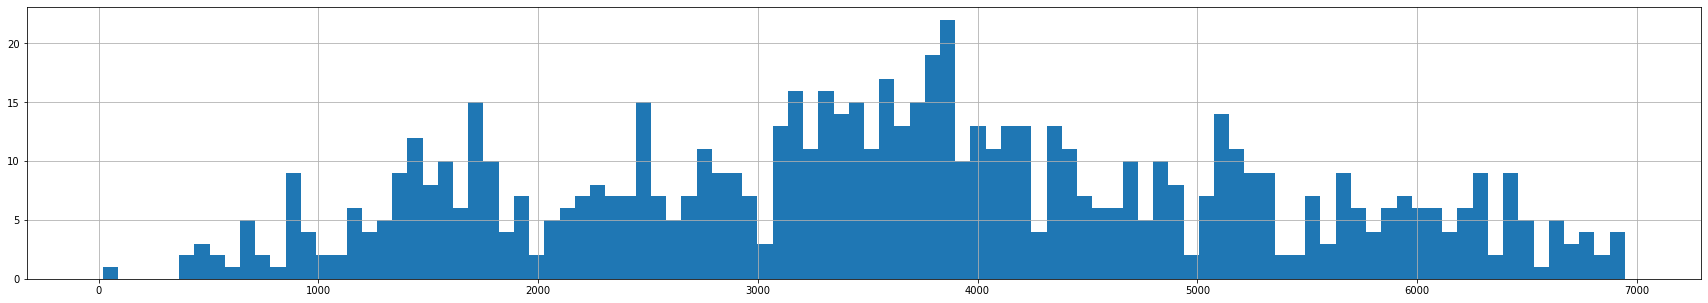

In [216]:
data_df['Registered'].hist(bins=100)

#### cnt

In [217]:
data_df['cnt'].unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

In [218]:
data_df['cnt'].dtypes

dtype('int64')

In [219]:
data_df["cnt"].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

<AxesSubplot:>

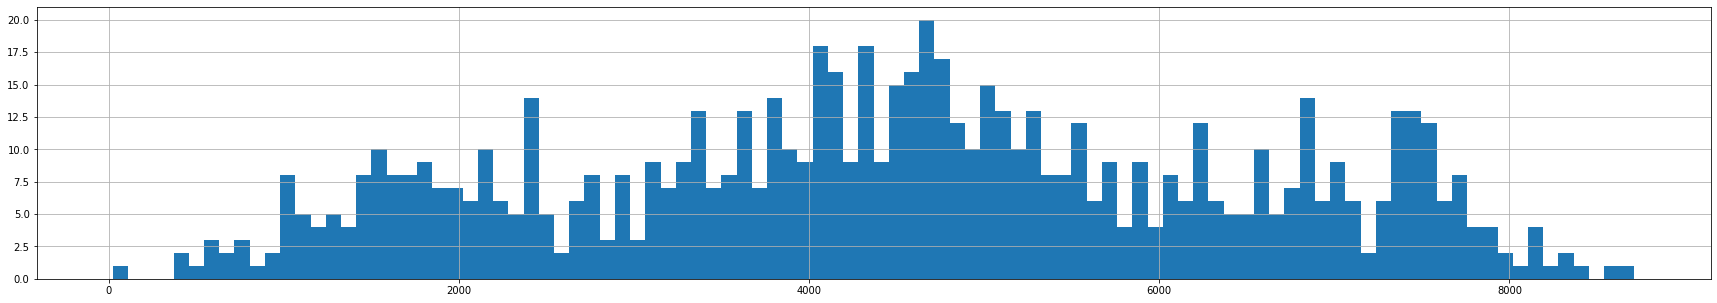

In [220]:
data_df['cnt'].hist(bins=100)

## **2. Análisis de datos** (15 pts)
Analice las variables del dataset, entienda sus distribuciones y correlaciones, utilice ayudas visuales. 

** NOTA: **
Se ha realizado un análisis del comportamiento de cada variable en la sección anterior. En esta escción se completará el análisis para las variables que lo requieran y se visualizará un poco el comportamiento de los datos con el apoyo de algunas gráficas.

In [221]:
data_df.head()

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,8.2,9.1,0.81,10.75,331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,9.1,8.6,0.70,16.65,131,670,801
2,3,3/01/2020,Springer,No,Few clouds,1.2,0.9,0.44,16.64,120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,1.4,2.0,0.59,10.74,108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,2.7,2.8,0.44,12.52,82,1518,1600


Analizando la variable objetivo

In [222]:
data_df['cnt'].describe(percentiles = [.25, .5, .75, .95, .99])

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
95%      7576.000000
99%      8163.700000
max      8714.000000
Name: cnt, dtype: float64

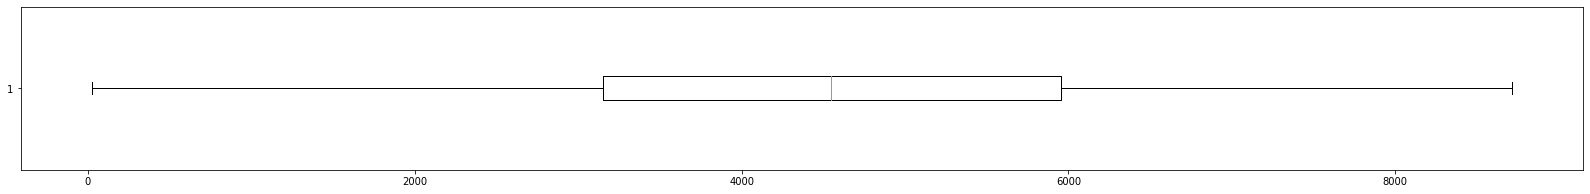

In [223]:
plt.figure(figsize = (28, 3))
plt.boxplot(data_df['cnt'], vert = False)
plt.show()

Viendo las correlaciones

<AxesSubplot:>

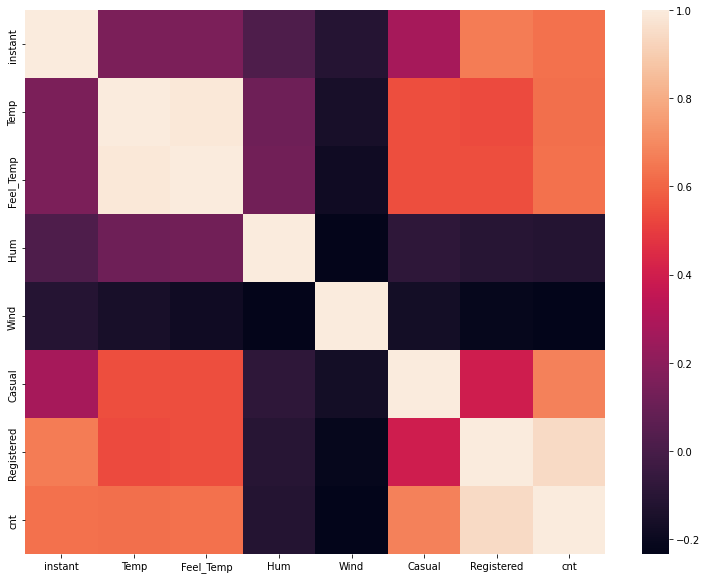

In [224]:
plt.figure(figsize = (13, 10))
sns.heatmap(data_df.corr())

* Se puede observar una alta correlación entre las variables: "cnt", "Casual" y "Registered". Esto tiene sentido puesto que las variables describen el número de usuarios que usaron la plataforma y sería conveniente usar la variable objetivo "cnt" únicamente, ya que esta contiene la inforación de las otras dos variables.
* Las variables "Temp" y "Feel_Temp" están altamente correlacionadas, por lo que se puede combinar la información de las dos para crear una nueva columna y remover la información de las dos variables.
* La variable "instant" se removerá debido a que contiene información del índice en el conjunto de datos, lo que no aporta información.

#### Generando nuevas variables

In [225]:
data_df['Temp_All'] = (data_df['Temp'] + data_df['Feel_Temp']) / 2
data_df.head()

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Temp_All
0,1,1/01/2020,Springer,No,Mist + Cloudy,8.2,9.1,0.81,10.75,331,654,985,8.65
1,2,2/01/2020,Springer,No,Mist + Cloudy,9.1,8.6,0.70,16.65,131,670,801,8.85
2,3,3/01/2020,Springer,No,Few clouds,1.2,0.9,0.44,16.64,120,1229,1349,1.05
3,4,4/01/2020,Springer,No,Few clouds,1.4,2.0,0.59,10.74,108,1454,1562,1.70
4,5,5/01/2020,Springer,No,Partly cloudy,2.7,2.8,0.44,12.52,82,1518,1600,2.75


Removiendo las columnas mencionadas anteriormente:

In [226]:
test = data_df.drop(columns=['instant', 'Temp', 'Feel_Temp', 'Casual', 'Registered'])
test.head()

,Date,Season,Holiday,Weather,Hum,Wind,cnt,Temp_All
0,1/01/2020,Springer,No,Mist + Cloudy,0.81,10.75,985,8.65
1,2/01/2020,Springer,No,Mist + Cloudy,0.70,16.65,801,8.85
2,3/01/2020,Springer,No,Few clouds,0.44,16.64,1349,1.05
3,4/01/2020,Springer,No,Few clouds,0.59,10.74,1562,1.70
4,5/01/2020,Springer,No,Partly cloudy,0.44,12.52,1600,2.75


Teniendo en cuenta que es de interés para el negocio ver el comportamiento de de los usuarios en la semana, se creará una nueva columna con la información del día.
Para esto se ha desarrollado una función que haga la fecha consistente. Por otra parte, se ha evidenciado que los números de días no corresponden a los años indicados en el dataset, puesto que se indica que en el año 2021 el mes de Febrero tuvo 29 días, lo cual no ocurrió. Por lo anterior, se dice que la columna de fecha tienen el año mal asignado, ya que el último año que fue bisiesto es el 2020.
Si se usan datos que no corresponden a los días de la semana correctamente, el análisis realizado no será confiable puesto que los días de la semana se etiquetarían de forma diferente.
Teniendo en cuenta todo lo anterior, se toma la decisión de modificar el valor de año de la columna fecha, restándole un año a cada valor. De esta forma, se logra que el año bisiesto coincida correctamente.

In [227]:
data_df['Day'] = np.nan

In [228]:
data_df

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Temp_All,Day
0,1,1/01/2020,Springer,No,Mist + Cloudy,8.2,9.1,0.81,10.75,331,654,985,8.65,NaN
1,2,2/01/2020,Springer,No,Mist + Cloudy,9.1,8.6,0.70,16.65,131,670,801,8.85,NaN
2,3,3/01/2020,Springer,No,Few clouds,1.2,0.9,0.44,16.64,120,1229,1349,1.05,NaN
3,4,4/01/2020,Springer,No,Few clouds,1.4,2.0,0.59,10.74,108,1454,1562,1.70,NaN
4,5,5/01/2020,Springer,No,Partly cloudy,2.7,2.8,0.44,12.52,82,1518,1600,2.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2021,Springer,No,Mist + Cloudy,3.9,2.7,0.65,23.46,247,1867,2114,3.30,NaN
727,728,28/12/2021,Springer,No,Mist + Few clouds,3.9,4.0,0.59,10.42,644,2451,3095,3.95,NaN
728,729,29/12/2021,Springer,No,Mist,3.9,3.4,0.75,8.33,159,1182,1341,3.65,NaN
729,730,30/12/2021,Springer,No,Few clouds,4.0,2.9,0.48,23.50,364,1432,1796,3.45,NaN


In [229]:
def fix_date(date):
    split = date.split("/")
    day = split[0]
    month = split[1]
    year = int(split[2]) - 1
    if len(day) == 1:
        day = "0" + day
    return day + "/" + month + "/" + str(year)

In [230]:
data_df['Date'] = data_df['Date'].apply(lambda x: fix_date(x))

In [231]:
data_df['Date']

0      01/01/2019
1      02/01/2019
2      03/01/2019
3      04/01/2019
4      05/01/2019
          ...    
726    27/12/2020
727    28/12/2020
728    29/12/2020
729    30/12/2020
730    31/12/2020
Name: Date, Length: 731, dtype: object

In [232]:
rows = data_df.shape[0]
for i in range(0,rows):
    data_df['Day'][i] = calendar.day_name[datetime.strptime(data_df['Date'][i], "%d/%m/%Y").weekday()]

C:\Users\sword\AppData\Local\Temp/ipykernel_4612/2619212563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Day'][i] = calendar.day_name[datetime.strptime(data_df['Date'][i], "%d/%m/%Y").weekday()]


In [233]:
data_df.head()

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Temp_All,Day
0,1,01/01/2019,Springer,No,Mist + Cloudy,8.2,9.1,0.81,10.75,331,654,985,8.65,Tuesday
1,2,02/01/2019,Springer,No,Mist + Cloudy,9.1,8.6,0.70,16.65,131,670,801,8.85,Wednesday
2,3,03/01/2019,Springer,No,Few clouds,1.2,0.9,0.44,16.64,120,1229,1349,1.05,Thursday
3,4,04/01/2019,Springer,No,Few clouds,1.4,2.0,0.59,10.74,108,1454,1562,1.70,Friday
4,5,05/01/2019,Springer,No,Partly cloudy,2.7,2.8,0.44,12.52,82,1518,1600,2.75,Saturday


Removiendo las columnas:
 * Fueron unificadas: "Temp" y "Feel_Temp"
 * Que se considera no aportan información al ser un índice: "instant"
 * Que están correlacionadas porque la variable objetivo las contiene: "Casual" y "Registered"
 * Qué no aporta información porque la requerida ya fue extraída a otra columna y existe otra columna que aporta la información de temporada: "Date"
 * Que no aportan suficiente información al estar muy desbalanceado

In [234]:
data_df.drop(columns=['instant', 'Temp', 'Feel_Temp', 'Casual', 'Registered', 'Date', 'Holiday'], inplace=True)
data_df.head()

,Season,Weather,Hum,Wind,cnt,Temp_All,Day
0,Springer,Mist + Cloudy,0.81,10.75,985,8.65,Tuesday
1,Springer,Mist + Cloudy,0.70,16.65,801,8.85,Wednesday
2,Springer,Few clouds,0.44,16.64,1349,1.05,Thursday
3,Springer,Few clouds,0.59,10.74,1562,1.70,Friday
4,Springer,Partly cloudy,0.44,12.52,1600,2.75,Saturday


### Visualización de datos:

Número de veces rentado en cada día de la semana:

In [235]:
temp = data_df.groupby('Day').sum()
temp.reset_index(inplace=True)
temp

,Day,Hum,Wind,cnt,Temp_All
0,Friday,66.79,1336.66,469109,1581.70
1,Monday,63.85,1298.96,487790,1530.55
2,Saturday,67.41,1308.34,473048,1578.35
3,Sunday,63.70,1333.21,485395,1575.35
4,Thursday,66.97,1341.53,455503,1542.15
5,Tuesday,65.68,1376.76,477807,1494.95
6,Wednesday,66.49,1326.88,444027,1502.85


<AxesSubplot:xlabel='Day'>

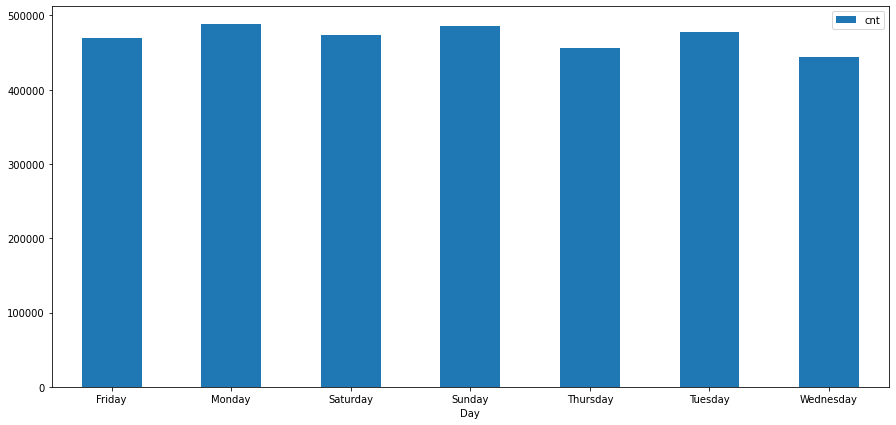

In [236]:
temp.plot.bar(x='Day', y='cnt', rot=0, figsize=(15,7))

Número de veces rentado con relación al ambiente:

In [237]:
temp = data_df.groupby('Season').sum()
temp.reset_index(inplace=True)
temp

,Season,Hum,Wind,cnt,Temp_All
0,Fall,119.00,2167.72,1061129,4502.80
1,Springer,106.98,2594.85,471348,1086.75
2,Summer,115.64,2508.83,918589,3133.25
3,Winter,119.27,2050.94,841613,2083.10


<AxesSubplot:xlabel='Season'>

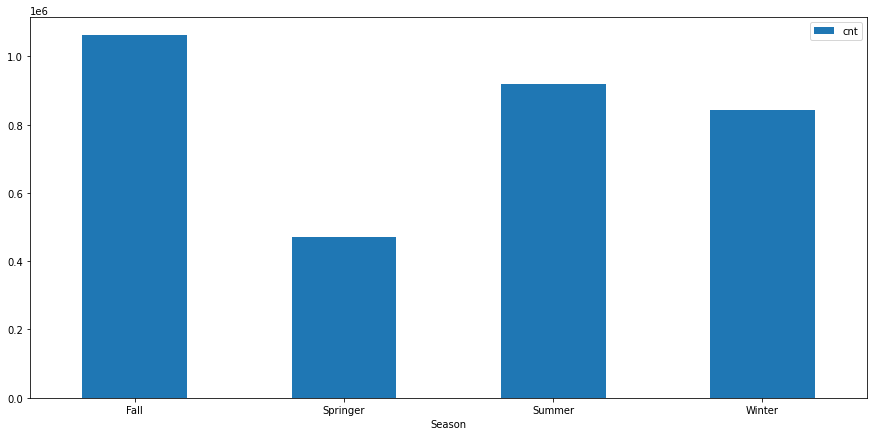

In [238]:
temp.plot.bar(x='Season', y='cnt', rot=0, figsize=(15,7))

Estados del tiempo vs número de rentas realizadas

In [239]:
temp = data_df.groupby('Weather').sum()
temp.reset_index(inplace=True)
temp

,Weather,Hum,Wind,cnt,Temp_All
0,Partly cloudy,72.56,1687.41,599038,1938.25
1,Partly cloudy,60.62,1338.38,501234,1625.70
2,Clear,63.52,1345.02,569359,1778.90
3,Few clouds,66.34,1523.70,588321,1828.80
4,Light Rain + Scattered clouds,6.75,114.13,13018,107.05
5,Mist,39.51,677.47,203163,675.00
6,Mist + Broken clouds,50.73,822.02,284035,941.80
7,Mist + Cloudy,46.93,870.57,286658,997.45
8,Mist + Few clouds,42.56,715.41,223002,770.30
9,Rain + Thunderstorm,6.10,114.48,15338,89.60


<AxesSubplot:xlabel='Weather'>

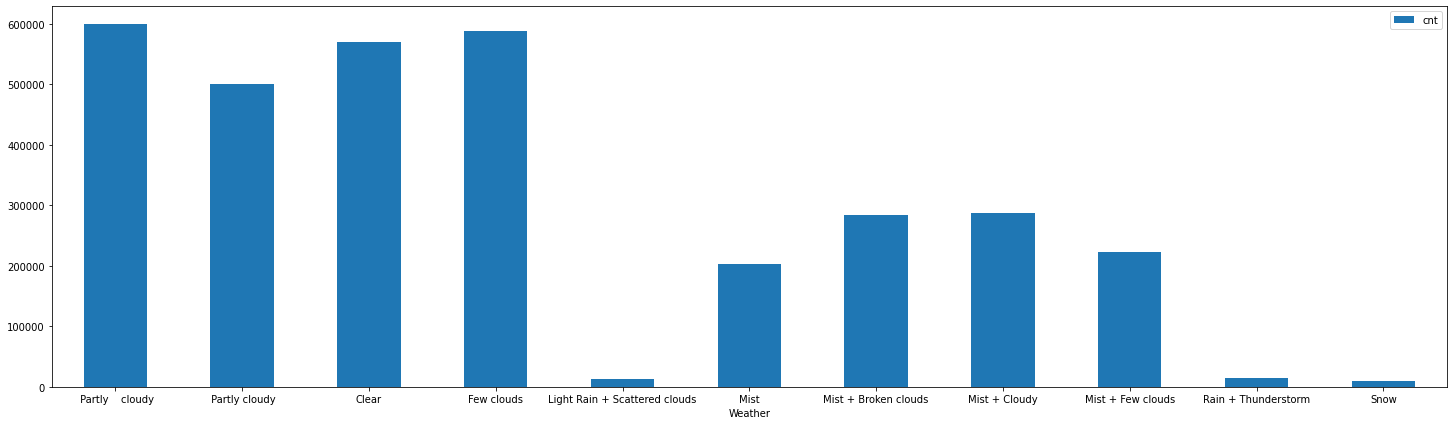

In [240]:
temp.plot.bar(x='Weather', y='cnt', rot=0, figsize=(25,7))

Número de rentas realizadas vs la variable temperatura

<AxesSubplot:xlabel='Temp_All', ylabel='cnt'>

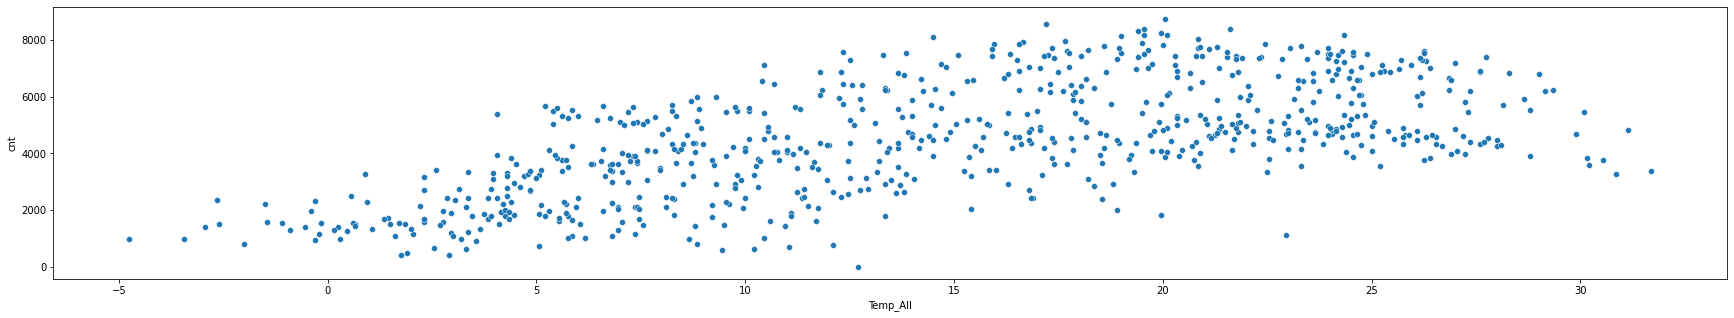

In [241]:
sns.scatterplot(x="Temp_All", y="cnt", data=data_df)

Número de rentas realizadas vs la variable humedad

<AxesSubplot:xlabel='Hum', ylabel='cnt'>

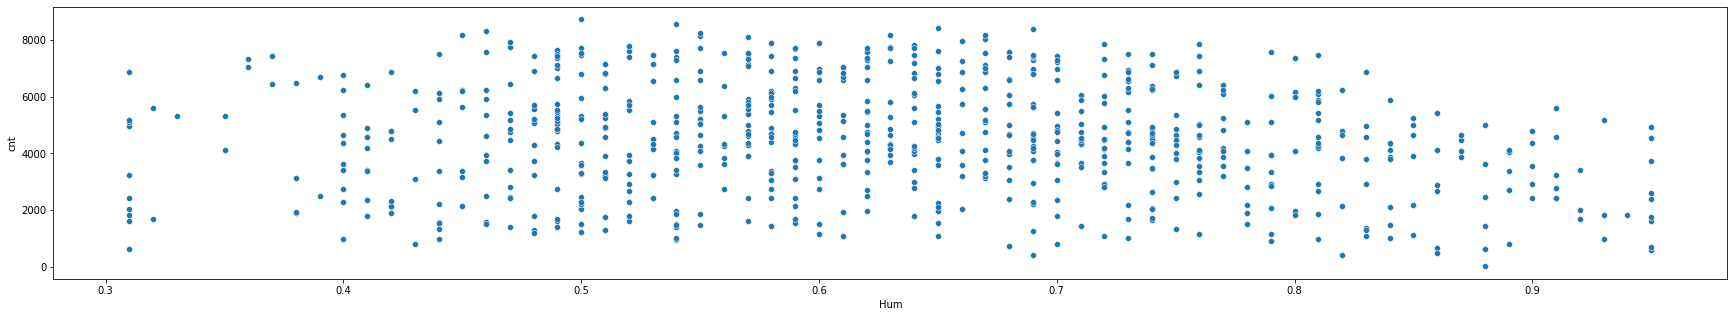

In [242]:
sns.scatterplot(x="Hum", y="cnt", data=data_df)

Número de rentas realizadas vs la variable velocidad del viento

<AxesSubplot:xlabel='Wind', ylabel='cnt'>

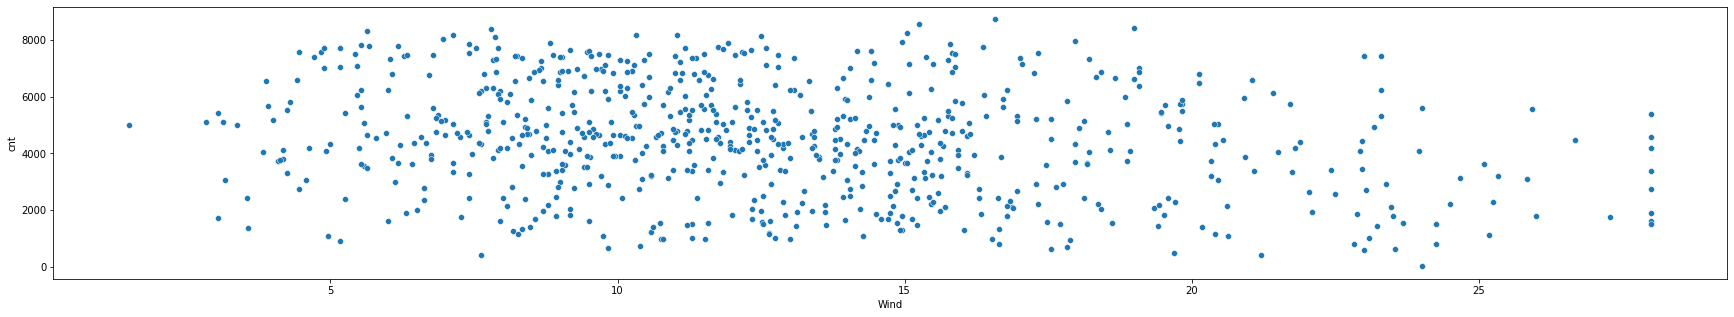

In [243]:
sns.scatterplot(x="Wind", y="cnt", data=data_df)

### Codificación de columnas

In [244]:
labelencoder = LabelEncoder()
data_df['Season_encoded'] = labelencoder.fit_transform(data_df['Season'])
data_df['Weather_encoded'] = labelencoder.fit_transform(data_df['Weather'])
data_df['Day_encoded'] = labelencoder.fit_transform(data_df['Day'])
data_df

,Season,Weather,Hum,Wind,cnt,Temp_All,Day,Season_encoded,Weather_encoded,Day_encoded
0,Springer,Mist + Cloudy,0.81,10.75,985,8.65,Tuesday,1,7,5
1,Springer,Mist + Cloudy,0.70,16.65,801,8.85,Wednesday,1,7,6
2,Springer,Few clouds,0.44,16.64,1349,1.05,Thursday,1,3,4
3,Springer,Few clouds,0.59,10.74,1562,1.70,Friday,1,3,0
4,Springer,Partly cloudy,0.44,12.52,1600,2.75,Saturday,1,0,2
...,...,...,...,...,...,...,...,...,...,...
726,Springer,Mist + Cloudy,0.65,23.46,2114,3.30,Sunday,1,7,3
727,Springer,Mist + Few clouds,0.59,10.42,3095,3.95,Monday,1,8,1
728,Springer,Mist,0.75,8.33,1341,3.65,Tuesday,1,5,5
729,Springer,Few clouds,0.48,23.50,1796,3.45,Wednesday,1,3,6


Removiendo las columnas no codificadas

In [245]:
data_df.drop(columns=['Season', 'Weather', 'Day'], inplace=True)
data_df.head()

,Hum,Wind,cnt,Temp_All,Season_encoded,Weather_encoded,Day_encoded
0,0.81,10.75,985,8.65,1,7,5
1,0.70,16.65,801,8.85,1,7,6
2,0.44,16.64,1349,1.05,1,3,4
3,0.59,10.74,1562,1.70,1,3,0
4,0.44,12.52,1600,2.75,1,0,2


## **3. Desarrollo de modelos de Machine Learning** (30 pts)
Implemente al menos 3 modelos basados en el algoritmo de regresión lineal: uno simple, uno polinomial y uno con algún tipo de regularización.


### 3.0 División de los datos

In [246]:
X = data_df.copy()
X.drop(columns=['cnt'], inplace=True)

Y = data_df['cnt']

In [247]:
print("Dimensiones dataframe de variables", X.shape)
print("Dimensiones dataframe de variable objetivo", Y.shape)

Dimensiones dataframe de variables (731, 6)
Dimensiones dataframe de variable objetivo (731,)


Se dividen los datos en entrenamiento (80%) y prueba (20%)

In [248]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [249]:
print("X Train: ", X_train.shape)
print("X Test: ", X_test.shape)
print("Y Train: ", Y_train.shape)
print("Y Train: ", Y_test.shape)

X Train:  (584, 6)
X Test:  (147, 6)
Y Train:  (584,)
Y Train:  (147,)


Normalizando los datos

In [250]:
abs_scaler = MaxAbsScaler()

abs_scaler.fit(X_train)
X_train_scaled = abs_scaler.transform(X_train)
X_test_scaled = abs_scaler.transform(X_test)

In [251]:
X_train_scaled_maxAbs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_maxAbs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_maxAbs

,Hum,Wind,Temp_All,Season_encoded,Weather_encoded,Day_encoded
0,0.557895,0.552857,0.539432,0.333333,0.0,0.166667
1,0.726316,0.952500,0.447950,1.000000,0.6,1.000000
2,0.800000,0.265000,0.503155,0.333333,0.8,0.833333
3,0.757895,0.299286,0.537855,0.666667,0.2,0.166667
4,0.568421,0.562500,0.394322,1.000000,0.3,0.166667
...,...,...,...,...,...,...
579,0.747368,0.337857,0.365931,1.000000,0.6,1.000000
580,0.884211,0.241071,0.290221,1.000000,0.6,1.000000
581,0.526316,0.327500,0.235016,0.333333,0.0,0.666667
582,0.642105,0.605714,0.712934,0.000000,0.2,0.333333


### **3.1 Regresión lineal simple**

In [252]:
regr = LinearRegression()
regr.fit(X_train_scaled_maxAbs, Y_train)

LinearRegression()

In [253]:
regr.coef_

array([-3735.20187866, -1860.60824952,  5409.59110156,  1316.26116257,
         -53.40446779,   -49.91610415])

In [254]:
regr.intercept_

4736.213049584557

In [255]:
preds_train = regr.predict(X_train_scaled_maxAbs)
preds_test = regr.predict(X_test_scaled_maxAbs)

In [256]:
# Train
MAE_train = mean_absolute_error(Y_train, preds_train)
MAE_test = mean_absolute_error(Y_test, preds_test)
# Test
RMSE_train = np.sqrt(mean_squared_error(Y_train, preds_train))
RMSE_test = np.sqrt(mean_squared_error(Y_test, preds_test))

In [257]:
print('Mean Absolute Error: Train ', MAE_train)
print('Mean Absolute Error: Test ', MAE_test)

Mean Absolute Error: Train  1138.0107163795672
Mean Absolute Error: Test  1024.2804124402173


In [258]:
print('Root Mean Squared Error: Train ', RMSE_train)
print('Root Mean Squared Error: Test', RMSE_test)

Root Mean Squared Error: Train  1362.4267363532633
Root Mean Squared Error: Test 1221.174328726481


Creando un Dataframe para los resultados:

In [259]:
results_Reg_Simple = pd.DataFrame(columns=["Modelo", "Conjunto", "MAE", "RMSE", "Alpha", ])

In [260]:
results_Reg_Simple = results_Reg_Simple.append({"Modelo":"Regresion lineal simple",
                                  "Conjunto": "Entrenamiento",
                                  "MAE": MAE_train,
                                  "RMSE": RMSE_train,
                                  "Alpha": "NA"}, ignore_index=True)

C:\Users\sword\AppData\Local\Temp/ipykernel_4612/3793097412.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Reg_Simple = results_Reg_Simple.append({"Modelo":"Regresion lineal simple",


In [261]:
results_Reg_Simple = results_Reg_Simple.append({"Modelo":"Regresion lineal simple",
                                  "Conjunto": "Prueba",
                                  "MAE": MAE_test,
                                  "RMSE": RMSE_test,
                                  "Alpha": "NA"}, ignore_index=True)

C:\Users\sword\AppData\Local\Temp/ipykernel_4612/2145220729.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Reg_Simple = results_Reg_Simple.append({"Modelo":"Regresion lineal simple",


In [262]:
results_Reg_Simple

,Modelo,Conjunto,MAE,RMSE,Alpha
0,Regresion lineal simple,Entrenamiento,1138.010716,1362.426736,NA
1,Regresion lineal simple,Prueba,1024.280412,1221.174329,NA


### **3.2 Regresión lineal polinomial**

Transformación polinomial:

In [263]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

Creando el modelo lineal

In [264]:
regr = LinearRegression()
regr.fit(X_poly_train, Y_train)

LinearRegression()

In [265]:
preds_train = regr.predict(X_poly_train)
preds_test = regr.predict(X_poly_test)

In [266]:
# Train
MAE_train = mean_absolute_error(Y_train, preds_train)
MAE_test = mean_absolute_error(Y_test, preds_test)
# Test
RMSE_train = np.sqrt(mean_squared_error(Y_train, preds_train))
RMSE_test = np.sqrt(mean_squared_error(Y_test, preds_test))

In [267]:
print('Mean Absolute Error: Train ', MAE_train)
print('Mean Absolute Error: Test ', MAE_test)

Mean Absolute Error: Train  915.0344360400991
Mean Absolute Error: Test  1067.9176566947433


In [268]:
print('Root Mean Squared Error: Train ', RMSE_train)
print('Root Mean Squared Error: Test', RMSE_test)

Root Mean Squared Error: Train  1081.818927048839
Root Mean Squared Error: Test 1270.7482627891561


In [269]:
results_Reg_Poly = pd.DataFrame(columns=["Modelo", "Conjunto", "MAE", "RMSE", "Alpha", ])

In [270]:
results_Reg_Poly = results_Reg_Poly.append({"Modelo":"Regresion lineal polinomial",
                                  "Conjunto": "Entrenamiento",
                                  "MAE": MAE_train,
                                  "RMSE": RMSE_train,
                                  "Alpha": "NA"}, ignore_index=True)

C:\Users\sword\AppData\Local\Temp/ipykernel_4612/3830154144.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Reg_Poly = results_Reg_Poly.append({"Modelo":"Regresion lineal polinomial",


In [271]:
results_Reg_Poly = results_Reg_Poly.append({"Modelo":"Regresion lineal polinomial",
                                  "Conjunto": "Prueba",
                                  "MAE": MAE_test,
                                  "RMSE": RMSE_test,
                                  "Alpha": "NA"}, ignore_index=True)

C:\Users\sword\AppData\Local\Temp/ipykernel_4612/925577729.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Reg_Poly = results_Reg_Poly.append({"Modelo":"Regresion lineal polinomial",


In [272]:
results_Reg_Poly

,Modelo,Conjunto,MAE,RMSE,Alpha
0,Regresion lineal polinomial,Entrenamiento,915.034436,1081.818927,NA
1,Regresion lineal polinomial,Prueba,1067.917657,1270.748263,NA


### **3.3 Regresión Ridge**

In [273]:
RidgeModel = Ridge(alpha = 1, random_state=20)
RidgeModel.fit(X_train, Y_train)
#RidgeModel.fit(X_poly_train, Y_train)

Ridge(alpha=1, random_state=20)

In [274]:
#y_pred_train = RidgeModel.predict(X_poly_train)
#y_pred_test = RidgeModel.predict(X_poly_test)
y_pred_train = RidgeModel.predict(X_train)
y_pred_test = RidgeModel.predict(X_test)

In [275]:
print('MAE: Train ', mean_absolute_error(Y_train, y_pred_train))
print('MAE: Test ', mean_absolute_error(Y_test, y_pred_test))
print('RMSE: Train ', np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print('RMSE: Test', np.sqrt(mean_squared_error(Y_test, y_pred_test)))

MAE: Train  1143.4970217343764
MAE: Test  1020.7873270629995
RMSE: Train  1363.4674058834946
RMSE: Test 1211.3410350732504


Con estos resultados nos damos cuenta que este modelo tiene un mejor desempeño que el regresor lineal. Sin embargo, se podría mejorar el desempeño encontrando unos mejores hiper parámetros.

In [276]:
# Lists definition
results = []
alphaValues = []
rmseResult_training = []
rmseResult_test = []
maeResult_training = []
maeResult_test = []
results_Ridge = pd.DataFrame(columns=["Modelo", "Conjunto", "MAE", "RMSE", "Alpha", ])

# Iterating all values and calculating the error for each alpha value

alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]

for i in alphas:

    # Adding the alpha value to the list
    alphaValues.append(i);

    # Calculating model with the alpha value "i"
    RidgeModel = Ridge(alpha = i, random_state=20)
    RidgeModel.fit(X_train, Y_train)
    #RidgeModel.fit(X_poly_train, Y_train)

    # Prediction for training values
    y_pred_train = RidgeModel.predict(X_train)
    #y_pred_train = RidgeModel.predict(X_poly_train)
    # Calculating the mean squared error
    RMSE_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
    # Calculating the median absolute error
    MAE_train = mean_absolute_error(Y_train, y_pred_train)
    # Append to list
    rmseResult_training.append(RMSE_train)
    maeResult_training.append(MAE_train)

    # FOR TEST VALUES
    # Prediction for test values
    y_pred_test = RidgeModel.predict(X_test)
    #y_pred_test = RidgeModel.predict(X_poly_test)
    # Calculating the mean squared error
    RMSE_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
    # Calculating the median absolute error
    MAE_test = mean_absolute_error(Y_test, y_pred_test)
    # Append to list
    rmseResult_test.append(RMSE_test)
    maeResult_test.append(MAE_test)

    results_Ridge = results_Ridge.append({"Modelo":"Ridge",
                                          "Conjunto": "Entrenamiento",
                                          "MAE": MAE_train,
                                          "RMSE": RMSE_test,
                                          "Alpha": i}, ignore_index=True)

    results_Ridge = results_Ridge.append({"Modelo":"Ridge",
                                          "Conjunto": "Prueba",
                                          "MAE": MAE_test,
                                          "RMSE": RMSE_test,
                                          "Alpha": i}, ignore_index=True)

C:\Users\sword\AppData\Local\Temp/ipykernel_4612/3283568856.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Ridge = results_Ridge.append({"Modelo":"Ridge",
C:\Users\sword\AppData\Local\Temp/ipykernel_4612/3283568856.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Ridge = results_Ridge.append({"Modelo":"Ridge",
C:\Users\sword\AppData\Local\Temp/ipykernel_4612/3283568856.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Ridge = results_Ridge.append({"Modelo":"Ridge",
C:\Users\sword\AppData\Local\Temp/ipykernel_4612/3283568856.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Ridge = results_

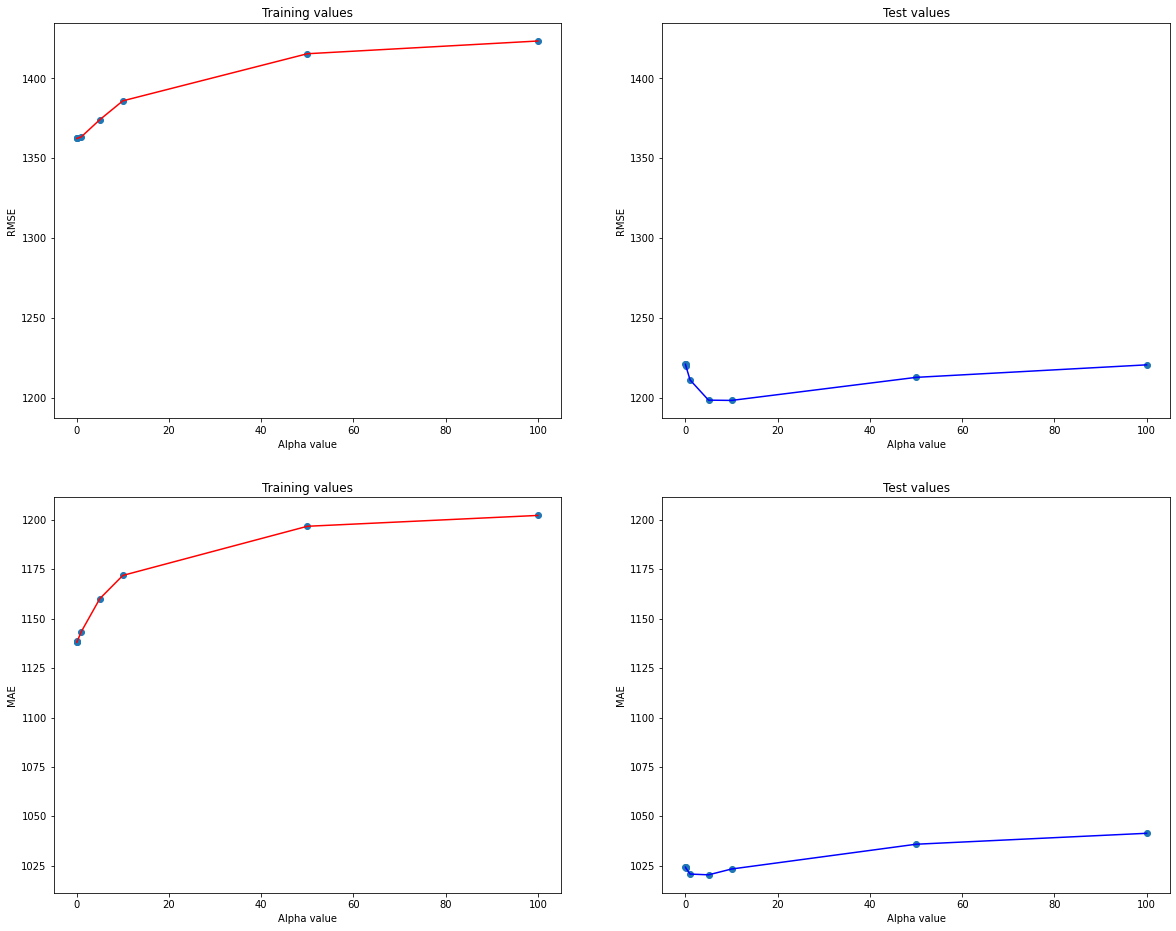

In [277]:
f = plt.figure(figsize=(20,16))

ax1 = f.add_subplot(221)
plt.scatter(alphas, np.array(rmseResult_training))
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, np.array(rmseResult_training), color = 'red')
plt.title('Training values')

ax2 = f.add_subplot(222, sharey = ax1)
plt.scatter(alphas, rmseResult_test)
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, rmseResult_test, color = 'blue')
plt.title('Test values')

ax3 = f.add_subplot(223)
plt.scatter(alphas, np.array(maeResult_training))
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, np.array(maeResult_training), color = 'red')
plt.title('Training values')

ax4 = f.add_subplot(224, sharey = ax3)
plt.scatter(alphas, maeResult_test)
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, maeResult_test, color = 'blue')
plt.title('Test values')

plt.show()

In [278]:
results_Ridge

,Modelo,Conjunto,MAE,RMSE,Alpha
0,Ridge,Entrenamiento,1138.016563,1221.161657,0.001
1,Ridge,Prueba,1024.275062,1221.161657,0.001
2,Ridge,Entrenamiento,1138.069110,1221.047914,0.010
3,Ridge,Prueba,1024.226975,1221.047914,0.010
4,Ridge,Entrenamiento,1138.587471,1219.940343,0.100
5,Ridge,Prueba,1023.752684,1219.940343,0.100
6,Ridge,Entrenamiento,1143.497022,1211.341035,1.000
7,Ridge,Prueba,1020.787327,1211.341035,1.000
8,Ridge,Entrenamiento,1160.125365,1198.723327,5.000
9,Ridge,Prueba,1020.402508,1198.723327,5.000


De acuerdo a las gráficas que muestran el error obtenido de acuerdo al alpha asignado, se puede concluir que el mejor desempeño se obtiene con un alpha bajo, ya que existe una mejor proporción entre los resultados de entrenamiento y prueba. No deseamos un error de entrenamiento bajo y uno de prueba alto, ya que implicarìa que los datos se encuentras sobre ajustados.

### **3.4 Regresión Lasso**

In [279]:
LassoModel = Lasso(alpha=1, random_state=20)
LassoModel.fit(X_train, Y_train)
#LassoModel.fit(X_poly_train, Y_train)

Lasso(alpha=1, random_state=20)

In [280]:
#y_pred_train = LassoModel.predict(X_poly_train)
#y_pred_test = LassoModel.predict(X_poly_test)
y_pred_train = LassoModel.predict(X_train)
y_pred_test = LassoModel.predict(X_test)

In [281]:
print('Mean Absolute Error: Train ', mean_absolute_error(Y_train, y_pred_train))
print('Mean Absolute Error: Test ', mean_absolute_error(Y_test, y_pred_test))
print('Root Mean Squared Error: Train ', np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print('Root Mean Squared Error: Test', np.sqrt(mean_squared_error(Y_test, y_pred_test)))

Mean Absolute Error: Train  1138.8916685274255
Mean Absolute Error: Test  1023.6487869629941
Root Mean Squared Error: Train  1362.4565960321554
Root Mean Squared Error: Test 1219.547250876681


In [282]:
# Lists definition
results = []
alphaValues = []
rmseResult_training = []
rmseResult_test = []
maeResult_training = []
maeResult_test = []
results_Lasso = pd.DataFrame(columns=["Modelo", "Conjunto", "MAE", "RMSE", "Alpha", ])

# Iterating all values and calculating the error for each alpha value

alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]

for i in alphas:

    # Adding the alpha value to the list
    alphaValues.append(i);

    # Calculating model with the alpha value "i"
    LassoModel = Lasso(alpha = i, random_state=20)
    LassoModel.fit(X_train, Y_train)
    #LassoModel.fit(X_poly_train, Y_train)

    # Prediction for training values
    y_pred_train = LassoModel.predict(X_train)
    #y_pred_train = LassoModel.predict(X_poly_train)
    # Calculating the mean squared error
    RMSE_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
    # Calculating the median absolute error
    MAE_train = mean_absolute_error(Y_train, y_pred_train)
    # Append to list
    rmseResult_training.append(RMSE_train)
    maeResult_training.append(MAE_train)

    # FOR TEST VALUES
    # Prediction for test values
    y_pred_test = LassoModel.predict(X_test)
    #y_pred_test = LassoModel.predict(X_poly_test)
    # Calculating the mean squared error
    RMSE_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
    # Calculating the median absolute error
    MAE_test = mean_absolute_error(Y_test, y_pred_test)
    # Append to list
    rmseResult_test.append(RMSE_test)
    maeResult_test.append(MAE_test)

    results_Lasso = results_Lasso.append({"Modelo":"Lasso",
                                          "Conjunto": "Entrenamiento",
                                          "MAE": MAE_train,
                                          "RMSE": RMSE_test,
                                          "Alpha": i}, ignore_index=True)

    results_Lasso = results_Lasso.append({"Modelo":"Lasso",
                                          "Conjunto": "Prueba",
                                          "MAE": MAE_test,
                                          "RMSE": RMSE_test,
                                          "Alpha": i}, ignore_index=True)


C:\Users\sword\AppData\Local\Temp/ipykernel_4612/430618886.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Lasso = results_Lasso.append({"Modelo":"Lasso",
C:\Users\sword\AppData\Local\Temp/ipykernel_4612/430618886.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Lasso = results_Lasso.append({"Modelo":"Lasso",
C:\Users\sword\AppData\Local\Temp/ipykernel_4612/430618886.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Lasso = results_Lasso.append({"Modelo":"Lasso",
C:\Users\sword\AppData\Local\Temp/ipykernel_4612/430618886.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_Lasso = results_Lass

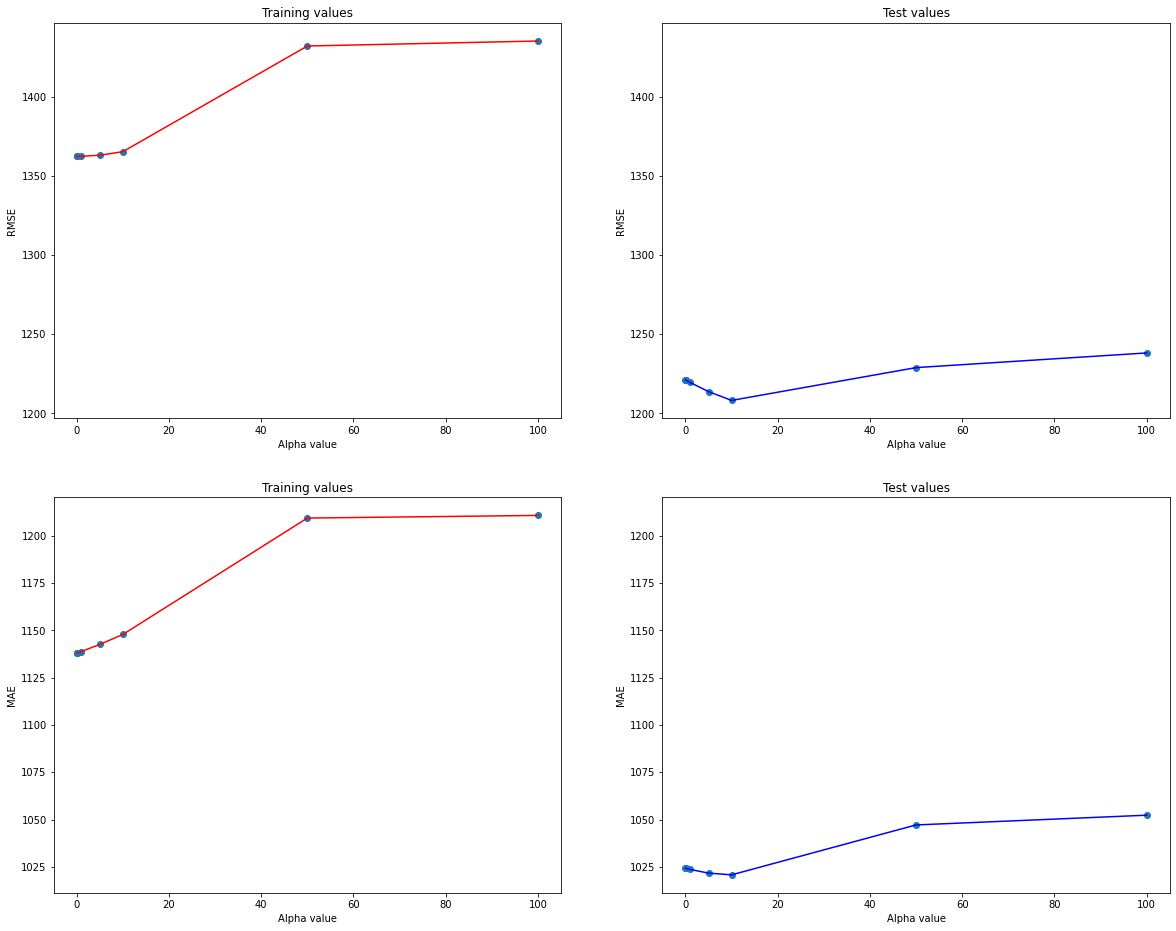

In [283]:
f = plt.figure(figsize=(20,16))

ax1 = f.add_subplot(221)
plt.scatter(alphas, np.array(rmseResult_training))
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, np.array(rmseResult_training), color = 'red')
plt.title('Training values')

ax2 = f.add_subplot(222, sharey = ax1)
plt.scatter(alphas, rmseResult_test)
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, rmseResult_test, color = 'blue')
plt.title('Test values')

ax3 = f.add_subplot(223)
plt.scatter(alphas, np.array(maeResult_training))
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, np.array(maeResult_training), color = 'red')
plt.title('Training values')

ax4 = f.add_subplot(224, sharey = ax3)
plt.scatter(alphas, maeResult_test)
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, maeResult_test, color = 'blue')
plt.title('Test values')

plt.show()

In [284]:
results_Lasso

,Modelo,Conjunto,MAE,RMSE,Alpha
0,Lasso,Entrenamiento,1138.011595,1221.172665,0.001
1,Lasso,Prueba,1024.279781,1221.172665,0.001
2,Lasso,Entrenamiento,1138.019500,1221.157704,0.010
3,Lasso,Prueba,1024.274097,1221.157704,0.010
4,Lasso,Entrenamiento,1138.098520,1221.008457,0.100
5,Lasso,Prueba,1024.217276,1221.008457,0.100
6,Lasso,Entrenamiento,1138.891669,1219.547251,1.000
7,Lasso,Prueba,1023.648787,1219.547251,1.000
8,Lasso,Entrenamiento,1142.636422,1213.768657,5.000
9,Lasso,Prueba,1021.709820,1213.768657,5.000


Al igual que el modelo anterior, un valor de alpha bajo obtiene mejores resultados.

## 4 Evaluación de modelos (20 pts)
Con base en el desempeño de cada uno de los modelos anteriormente desarrollados, concluya cual es el modelo que se le debe presentar al cliente y exponga sus razones.

La evaluación de los modelos se hace realizando una comparación de todas las medidas tomadas durante la construcción de los modelos. Asimismo, se tiene en cuenta la teoría del error en donde no deseamos tener un sobre-ajuste ni un sub-ajuste.

![sobre-ajuste vs sub-ajuste](Images/Overfitting-and-underfitting-effect-on-error.png)

In [285]:
frames = [results_Reg_Simple, results_Reg_Poly, results_Ridge, results_Lasso]
result = pd.concat(frames)

In [286]:
result.reset_index(inplace=True)
result.drop(columns=['index'], inplace=True)
result

,Modelo,Conjunto,MAE,RMSE,Alpha
0,Regresion lineal simple,Entrenamiento,1138.010716,1362.426736,NA
1,Regresion lineal simple,Prueba,1024.280412,1221.174329,NA
2,Regresion lineal polinomial,Entrenamiento,915.034436,1081.818927,NA
3,Regresion lineal polinomial,Prueba,1067.917657,1270.748263,NA
4,Ridge,Entrenamiento,1138.016563,1221.161657,0.001
5,Ridge,Prueba,1024.275062,1221.161657,0.001
6,Ridge,Entrenamiento,1138.069110,1221.047914,0.01
7,Ridge,Prueba,1024.226975,1221.047914,0.01
8,Ridge,Entrenamiento,1138.587471,1219.940343,0.1
9,Ridge,Prueba,1023.752684,1219.940343,0.1


Visualizando los errores MAE y RMSE más bajos obtenidos:

In [287]:
result[result['MAE'] == result['MAE'].min()]

,Modelo,Conjunto,MAE,RMSE,Alpha
2,Regresion lineal polinomial,Entrenamiento,915.034436,1081.818927,NA


In [288]:
result[result['RMSE'] == result['RMSE'].min()]

,Modelo,Conjunto,MAE,RMSE,Alpha
2,Regresion lineal polinomial,Entrenamiento,915.034436,1081.818927,NA


Si bien el error más bajos se logró con la regresión polinomial de grado 3, se puede ver que es el error del conjunto de entrenamiento; la diferencia entre el error de entrenamiento y prueba es más alta que los resultados presentados para otros modelos, por lo que inferimos que el modelo está sobre ajustado.

Teniendo en cuenta los errores de los demás modelos, se observa que el error más pequeño y con menor diferencia entre entrenamiento y prueba corresponde a:
* Ridge con alpha = 5

Los errores de entrenamiento y prueba para este modelo son:
* Entrenamiento:    1198.55
* Prueba:           1195.55

Esto nos indica que nuestras predicciones estarán alejadas alrededor de +1198 y -1198 del valor real, que en este caso es el número de bicicletas rentadas.

## **5 Interpretación** (10 pts)
El día de la presentación del modelo ante el cliente una persona de la alcaldía le hace las siguientes preguntas: 
* ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de usuarios?
* Describa cual es el escenario ideal para el incremento de usuarios
* ¿Qué pasos adicionales deberían tener en cuenta para una próxima iteración/mejora del modelo? 

1. Las tres variables màs importantes para la predicción de la cantidad de usuarios son:
* La temperatura ("Temp_All"), ya que entre más baja sea menos arrendamientos hay.
* El clima ("Weather"), debido a que se tiende a no usar el arrendamiento si el clima no es favorable. Este resultado parece lógico puesto que, por ejemplo, menos usuarios querran usar el servicio si llueve, ya que no querrán mojarse.
* La temporada del año ("Season"), ya que de acuerdo al análisis realizado se observó un imapcto entre el uso del servicio y la temporada del año.

2. El escenario ideal para el incremento de usuarios es:
* Un día en la temporada de otoño, en la que el clima sea despejado o parcialmente nublado, sin lluvia ni nieve, con una tempreatura aproximada entre los 15 y 28 grados Celcius.

3. Los pasos adicionales que tendría en cuenta en una próxima iteración o mejora del modelo son:
* Obtener más datos con las variables más relevantes, y que de ser posible se encuentren balanceados.
* Entrenar un modelo que sea capaz de realizar predicciones de series de tiempo, como por ejemplo LSTM. Esto permitiría entender mejor el comportamiento y ser capaces de tener en cuenta la variable tiempo para la predicción. En este caso, tendría que conocerse y entenderse este tipo de modelos para ser implementados. El suo de un modelo de este tipo permitiría tener en cuenta las variables de temporada del año, mes, día. Inclusive podría tenerse en cuenta las horas de cada día, en el caso de que se contara con dicha información en el conjutno de datos. Asimismo, esto podría ser una mejora para la recolección de datos futuros.